In [1]:
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [7]:
# bce = torch.nn.BCELoss()

w = torch.randn(1,1)
b = torch.randn(1,1)

lr = 1.0

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(x_train @ w + b)
  # h = 1 / (1+math.e ** (-(x_train@w+b)))
  cost = torch.mean(-y_train * torch.log(h) - (1-y_train)*torch.log(1-h))
  # cost = bce(h, y_train)

  cost.backward()

  with torch.no_grad():
    w = w - lr * w.grad
    b = b - lr * b.grad

    if epoch % 100 == 0:
      print(epoch, cost.item(), w.item(), b.item())

0 0.6906993389129639 -0.24976402521133423 1.6818580627441406
100 0.41468727588653564 -1.5430092811584473 4.688765525817871
200 0.3969670236110687 -1.950767159461975 5.932679653167725
300 0.39002594351768494 -2.209749460220337 6.716541767120361
400 0.3865891993045807 -2.393160581588745 7.269354343414307
500 0.38468289375305176 -2.530258893966675 7.6814985275268555
600 0.3835521936416626 -2.636099338531494 7.999108791351318
700 0.38285133242607117 -2.719569683074951 8.249268531799316
800 0.382403165102005 -2.786393165588379 8.449344635009766
900 0.3821100890636444 -2.840482234954834 8.611174583435059
1000 0.38191500306129456 -2.8846309185028076 8.743185997009277
1100 0.38178369402885437 -2.920896291732788 8.85157585144043
1200 0.38169410824775696 -2.950840711593628 8.941040992736816
1300 0.38163256645202637 -2.975663423538208 9.015181541442871
1400 0.38159021735191345 -2.9963090419769287 9.076831817626953
1500 0.3815605938434601 -3.0135271549224854 9.128235816955566
1600 0.38153991103172

In [13]:
# optimizer

w = torch.randn(1,1, requires_grad=True)
b = torch.randn(1,1, requires_grad=True)

optimizer = torch.optim.SGD([w,b], lr=1.0)
# optimizer = torch.optim.Adam([w,b], lr=1.0)
# optimizer = torch.optim.RMSprop([w,b], lr=0.1)

for epoch in range(3001):

  h = torch.sigmoid(x_train @ w + b)
  cost = torch.mean(-y_train * torch.log(h) - (1-y_train)*torch.log(1-h))

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():

    if epoch % 100 == 0:
      print(epoch, cost.item(), w.item(), b.item())

0 3.2300920486450195 0.6272982358932495 0.8216416239738464
100 0.4028950035572052 -1.7883379459381104 5.452763080596924
200 0.3858867585659027 -2.4414751529693604 7.420474529266357
300 0.3945361077785492 -2.65141224861145 8.537903785705566
400 0.38310015201568604 -2.8897359371185303 8.920879364013672
500 0.3855113983154297 -2.951732635498047 9.202488899230957
600 0.38462570309638977 -3.009866714477539 9.33582878112793
700 0.38370802998542786 -3.0445334911346436 9.407341957092285
800 0.3838343620300293 -3.0577359199523926 9.454371452331543
900 0.38403570652008057 -3.064547300338745 9.482415199279785
1000 0.38400015234947205 -3.070054292678833 9.496926307678223
1100 0.38395968079566956 -3.0732829570770264 9.505064964294434
1200 0.3839709460735321 -3.0747814178466797 9.510079383850098
1300 0.3839796781539917 -3.0756478309631348 9.512971878051758
1400 0.38397684693336487 -3.0762226581573486 9.514555931091309
1500 0.38397538661956787 -3.0765440464019775 9.515462875366211
1600 0.383976221084

In [9]:
x_test = torch.FloatTensor([[4.5],[1.1]])

test_result = torch.sigmoid(x_test@w+b)

print(torch.round(test_result))

tensor([[0.],
        [1.]])


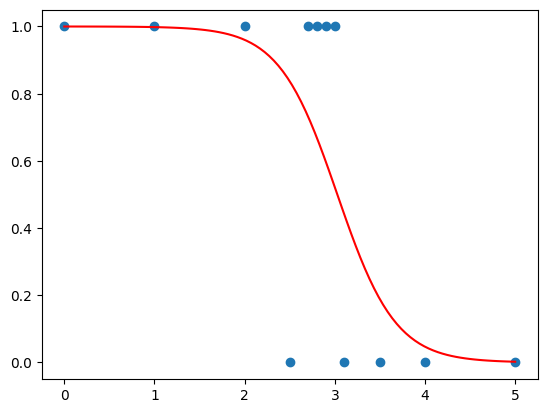

In [11]:
import matplotlib.pyplot as plt

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(X@w+b)

plt.scatter(x_train, y_train)
plt.plot(X, Y, c="red")
plt.show()

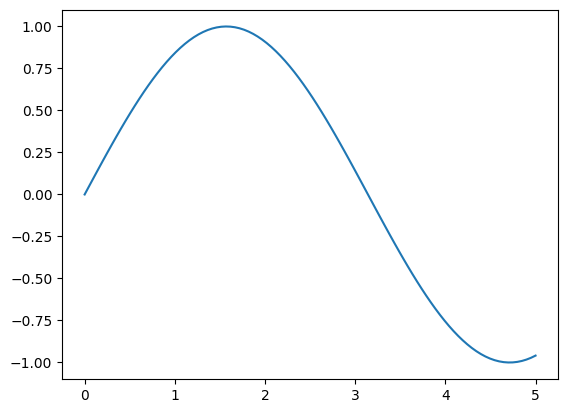

In [10]:
import math

X = [x.item() for x in torch.linspace(0, 5, 100)]
Y = [math.sin(x) for x in X]

plt.plot(X, Y)

In [15]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5],[1.1]]
res = model.predict(x_test)
print(res)

[[-3.10385806]] [9.39776831]
[0 1]
